# Unit 5 - Financial Planning

In [5]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv('example.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [9]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print("Bitcoin Price:", btc_price)
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print("Ethereum Price:", eth_price)
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Bitcoin Price: 45254.0
Ethereum Price: 2368.1
The current value of your 1.2 BTC is $54304.80
The current value of your 5.3 ETH is $12550.93


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
df_portfolio

SPY                                              \
                            close    high    low trade_count   open    volume   
timestamp                                                                       
2020-07-14 04:00:00+00:00  318.93  319.76  312.0      580272  313.3  94625450   

                                          AGG                              \
                                 vwap   close    high     low trade_count   
timestamp                                                                   
2020-07-14 04:00:00+00:00  316.274678  118.67  118.74  118.58       14582   

                                                        
                             open   volume        vwap  
timestamp                                               
2020-07-14 04:00:00+00:00  118.58  4295871  118.667416

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["SPY"]["close"])
spy_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $318.93
Current SPY closing price: $118.67


/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_24492/2664229116.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(df_portfolio["SPY"]["close"])
/var/folders/jp/x_d0tm_j75v5bcxxbpv_nllh0000gp/T/ipykernel_24492/2664229116.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(df_portfolio["AGG"]["close"])


In [14]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5933.50
The current value of your 200 AGG shares is $63786.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
amount = crypto + shares
value_data = {
    "amount": [crypto, shares]
}
index_values = ['crypto', 'shares']

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=index_values)
df_savings = df_savings.rename(index={index_values[0]: 'crypto', index_values[1]: 'shares'})

# Display savings DataFrame
df_savings

,amount
crypto,66855.73
shares,69719.50


<Axes: title={'center': 'Stocks Portfolio Composition'}, ylabel='amount'>

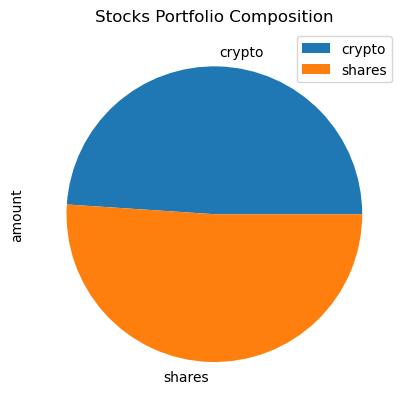

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Stocks Portfolio Composition")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
portfolio_value = crypto + shares

# Validate saving health
if portfolio_value > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif portfolio_value == emergency_fund:
    print("Congratulations! You have reached an important financial goal.")
else:
    print(f"You are ${emergency_fund - portfolio_value} away from reaching your savings goal.")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]
timeframe = "1Day"

ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Display sample data
df_stock_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                      AGG                      \
                              volume        vwap    close      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00   64747229  207.305695  110.605  110.7400  110.5200   
2016-05-03 04:00:00+00:00  108050343  206.309997  110.810  110.9450  110.7500   
2016-05-04 04:00:00+00:00   94995641  205.086315  110.860  110.9315  110.7595   
2016-05-05 04:00:00+00:00   68425268  205.140615  111.140  111.1600  110.8010   
2016-05-06 04:00:00+00:00   90999800  204.943796  110.970  111.1200  110.9700   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00       15122  110.74  3608552  110.626939  
2016-05-03 04:00:00+00:00       15663  110.89  3128774  110.864495  
2016-05-04 04:00:00+00:00       13984  110.91  3096337  110.877983  
2016-05-05 04:00:00+00:00       15708  110.92  3052967  111.030002  
2016-05-06 04:00:00+00:00       12697  111.12  2922700  111.027631

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [26]:
# Printing the simulation input data
MC_30.portfolio_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                                   AGG  \
                              volume        vwap daily_return    close   
timestamp                                                                
2016-05-02 04:00:00+00:00   64747229  207.305695          NaN  110.605   
2016-05-03 04:00:00+00:00  108050343  206.309997    -0.008707  110.810   
2016-05-04 04:00:00+00:00   94995641  205.086315    -0.005574  110.860   
2016-05-05 04:00:00+00:00   68425268  205.140615    -0.000195  111.140   
2016-05-06 04:00:00+00:00   90999800  204.943796     0.003659  110.970   

                                                                            \
                               high       low trade_count    open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200       15122  110.74  3608552   
2016-05-03 04:00:00+00:00  110.9450  110.7500       15663  110.89  3128774   
2016-05-04 04:00:00+00:00  110.9315  110.7595       13984  110.91  3096337   
2016-05-05 04:00:00+00:00  111.1600  110.8010       15708  110.92  3052967   
2016-05-06 04:00:00+00:00  111.1200  110.9700       12697  111.12  2922700   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.626939          NaN  
2016-05-03 04:00:00+00:00  110.864495     0.001853  
2016-05-04 04:00:00+00:00  110.877983     0.000451  
2016-05-05 04:00:00+00:00  111.030002     0.002526  
2016-05-06 04:00:00+00:00  111.027631    -0.001530

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 110.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 120.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 130.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 140.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 150.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 160.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 170.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 180.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 190.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 200.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 210.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 220.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 230.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 240.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 250.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 260.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 270.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 280.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 290.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 300.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 310.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 320.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 330.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 340.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 350.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 360.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 370.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 380.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 390.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 400.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 410.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 420.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 430.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 440.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 450.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 460.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 470.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 480.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 490.


/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/Minh/Desktop/FinTech_Class/module5challenge/python_challenge5/MCForecastTools.py:117: PerformanceWarning: DataFrame

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979056,1.004333,1.001317,1.008172,0.993395,0.994161,0.994464,1.003274,1.000702,1.002696,...,1.013533,0.992759,0.989653,1.011274,0.991726,1.005992,1.005228,1.004482,0.998495,1.005833
2,0.983151,1.001705,0.985556,1.003671,0.996874,0.993409,0.993195,1.003131,1.000487,1.005966,...,1.012636,1.003721,0.981978,1.014520,0.992582,1.001291,1.017422,1.001362,1.002578,1.012375
3,0.983239,1.008475,0.992733,1.004011,0.990446,0.993752,0.990103,1.002193,0.989169,0.996318,...,1.019723,0.995881,0.968995,1.005774,0.990035,1.003844,1.024762,0.999897,0.997391,1.006356
4,0.991889,1.019539,0.997394,1.009599,0.987980,1.000177,0.989753,0.992874,0.979999,1.005605,...,1.023582,0.997500,0.969221,1.007805,0.990509,1.014080,1.024895,1.001400,1.004550,1.008568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.481724,18.413894,21.443890,15.080113,7.034445,25.553866,12.935769,24.196328,17.686472,30.626625,...,7.300042,32.512644,31.154668,8.274060,15.285942,15.051600,7.824889,8.077759,12.323963,7.754328
7557,7.544271,18.515390,21.480358,15.298321,7.021946,25.583876,12.930917,24.119202,17.795778,30.576392,...,7.270303,32.317450,30.940165,8.245854,15.198610,15.041120,7.823007,8.034054,12.265216,7.802230
7558,7.496773,18.516992,21.343440,15.508248,7.035197,25.342587,13.093225,24.151886,18.116387,30.412528,...,7.319366,31.914142,30.891535,8.190121,15.310275,15.127460,7.841366,8.113687,12.245480,7.826208
7559,7.438663,18.577752,21.538195,15.585990,7.008273,25.303024,13.172824,24.205305,18.063270,30.558302,...,7.345827,31.970296,31.022853,8.183121,15.362726,15.150630,7.719807,8.177061,12.344985,7.769074


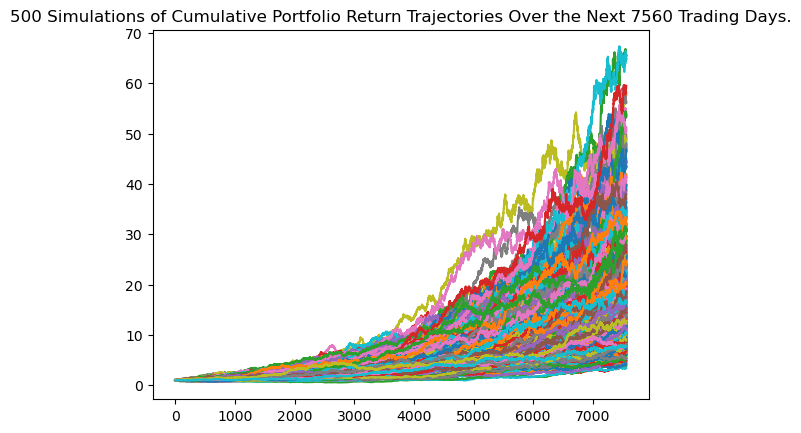

In [28]:
# Plot simulation outcomes
line_plot = MC_30.plot_simulation()

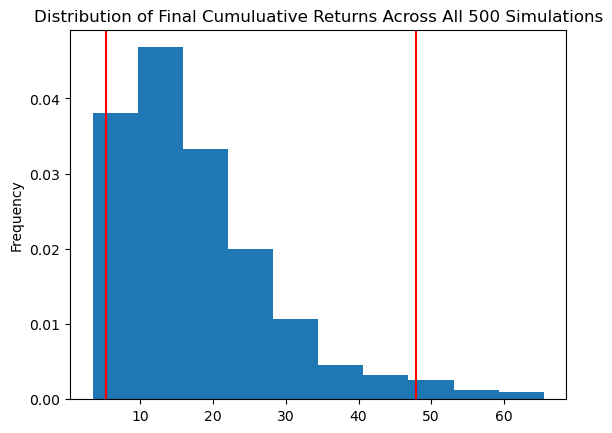

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30.summarize_cumulative_return()

# Print summary statistics
print(tbl)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'tbl' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [38]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'tbl' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")